In [1]:
from bs4 import BeautifulSoup
import requests
from requests.structures import CaseInsensitiveDict
import pandas as pd
import string
import re

def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext




def extract_argument(html_template, id_instance):
    args = []
    with open(html_template) as fp:
        soup = BeautifulSoup(fp, "html.parser")
    divTag = soup.find_all("div", {"id": id_instance})
    for tag in divTag:
        title = tag.find_all("h1")
        title = ' '.join(cleanhtml(str(title[0])).split())
    
        tdTags = tag.find_all("div", {"class": "container-box"})
        for tag in tdTags:

            p = tag.find('p').getText()
            args.append(p.rstrip('\r\n'))

    args=[re.sub(r'[\W\s]', ' ', e.lstrip().rstrip()).lower().rstrip().lstrip() \
          for e in args]
    d = {title:args}
    return d


def extract_argumentations_from_hit(html_template):
    d = {
        'section_1': extract_argument(html_template, "id_1"),
        'section_2': extract_argument(html_template, "id_2"),
        'section_3': extract_argument(html_template, "id_3"),
        'section_4': extract_argument(html_template, "type3"),
        'section_5': extract_argument(html_template, "id_1")}
    return d

def get_args(hit):
    a_lis = []
    for e in hit.values():
        for e in e.values():
            a_lis.append(e)
    args = [', '.join(e) for e in a_lis][:4]
    return pd.DataFrame(args)



/Users/user/miniconda3/envs/exaggerated_language/lib/python3.6/site-packages/requests/__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
hit_1 = extract_argumentations_from_hit("../experiments/cs1/surveys/stance_surveys/stance_hit_1.html")
hit_2 = extract_argumentations_from_hit("../experiments/cs1/surveys/stance_surveys/stance_hit_2.html")
hit_3 = extract_argumentations_from_hit("../experiments/cs1/surveys/stance_surveys/stance_hit_3.html")
hit_4 = extract_argumentations_from_hit("../experiments/cs1/surveys/stance_surveys/stance_hit_4.html")
hit_5 = extract_argumentations_from_hit("../experiments/cs1/surveys/stance_surveys/stance_hit_5.html")
hit_6 = extract_argumentations_from_hit("../experiments/cs1/surveys/stance_surveys/stance_hit_6.html")
hit_7 = extract_argumentations_from_hit("../experiments/cs1/surveys/stance_surveys/stance_hit_7.html")
hit_8 = extract_argumentations_from_hit("../experiments/cs1/surveys/stance_surveys/stance_hit_8.html")
hit_9 = extract_argumentations_from_hit("../experiments/cs1/surveys/stance_surveys/stance_hit_9.html")
hit_10 = extract_argumentations_from_hit("../experiments/cs1/surveys/stance_surveys/stance_hit_10.html")



hit_1 = get_args(hit_1)
hit_2 = get_args(hit_2)
hit_3 = get_args(hit_3)
hit_4 = get_args(hit_4)
hit_5 = get_args(hit_5)
hit_6 = get_args(hit_6)
hit_7 = get_args(hit_7)
hit_8 = get_args(hit_8)
hit_9 = get_args(hit_9)
hit_10 = get_args(hit_10)


pd.concat([hit_1, hit_2, hit_3, hit_4, hit_5, hit_6, hit_7, hit_8, hit_9, hit_10],
          ignore_index=True).head(3)

,0
0,while it is true that it is considered worse t...
1,for example it is responsible to use a cell p...
2,if an individual wants to live in the forest i...


## CS2

In [3]:
hit_1 = extract_argumentations_from_hit("../experiments/cs2/surveys/stance_surveys/stance_hit_1.html")
hit_2 = extract_argumentations_from_hit("../experiments/cs2/surveys/stance_surveys/stance_hit_2.html")
hit_3 = extract_argumentations_from_hit("../experiments/cs2/surveys/stance_surveys/stance_hit_3.html")
hit_4 = extract_argumentations_from_hit("../experiments/cs2/surveys/stance_surveys/stance_hit_4.html")
hit_5 = extract_argumentations_from_hit("../experiments/cs2/surveys/stance_surveys/stance_hit_5.html")
hit_6 = extract_argumentations_from_hit("../experiments/cs2/surveys/stance_surveys/stance_hit_6.html")
hit_7 = extract_argumentations_from_hit("../experiments/cs2/surveys/stance_surveys/stance_hit_7.html")
hit_8 = extract_argumentations_from_hit("../experiments/cs2/surveys/stance_surveys/stance_hit_8.html")
hit_9 = extract_argumentations_from_hit("../experiments/cs2/surveys/stance_surveys/stance_hit_9.html")
hit_10 = extract_argumentations_from_hit("../experiments/cs2/surveys/stance_surveys/stance_hit_10.html")




hit_1 = get_args(hit_1)
hit_2 = get_args(hit_2)
hit_3 = get_args(hit_3)
hit_4 = get_args(hit_4)
hit_5 = get_args(hit_5)
hit_6 = get_args(hit_6)
hit_7 = get_args(hit_7)
hit_8 = get_args(hit_8)
hit_9 = get_args(hit_9)
hit_10 = get_args(hit_10)


pd.concat([hit_1, hit_2, hit_3, hit_4, hit_5, hit_6, hit_7, hit_8, hit_9, hit_10],
          ignore_index=True).head(3)

,0
0,while it is true that it is considered worse t...
1,for example it is responsible to use a cell p...
2,if an individual wants to live in the forest i...


## Lexical Analysis

In [4]:
df = pd.read_csv('../data/crowdsourced/LIWC-22-1.csv')


In [5]:
strength = df[['Tone', 'tone_pos', 
    'tone_neg', 'emotion',  
    'emo_pos', 'emo_neg', 'emo_anx', 
    'emo_anger', 
    'emo_sad', 'swear']].mean()

df1 = pd.DataFrame(strength, columns=['lexical strength'])

In [6]:
df = pd.read_csv('../data/crowdsourced/LIWC-22-2.csv')


In [7]:
strength = df[['Tone', 'tone_pos', 
    'tone_neg', 'emotion',  
    'emo_pos', 'emo_neg', 'emo_anx', 
    'emo_anger', 
    'emo_sad', 'swear']].mean()

df2 = pd.DataFrame(strength, columns=['lexical strength'])

In [8]:
d = pd.DataFrame(pd.concat([df1, df2], axis=1)[['lexical strength','lexical strength']].mean(axis=1)).reset_index(level=0)
d.columns = ['LIWC Dimension', 'Score']
d['LIWC Dimension'] = d['LIWC Dimension'].apply(lambda x: ' '.join(x.split('_')).title())

/Users/user/miniconda3/envs/exaggerated_language/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
/Users/user/miniconda3/envs/exaggerated_language/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


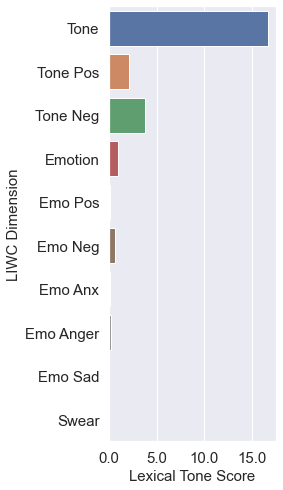

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(3,8))
sns.set(font_scale = 40)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_style("darkgrid")
ax = sns.barplot(x='Score', y="LIWC Dimension", data=d, orient='h')
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 15)
ax.set_xticklabels(ax.get_yticks(), size = 15)
ax.set_xticklabels(ax.get_xticks(), size = 15)
ax.set_xlabel('Lexical Tone Score',fontsize=15);
ax.set_ylabel('LIWC Dimension',fontsize=15);
plt.show()